---
title: "Visualizing *Mental Health Act* Apprehensions in Toronto (2014-2022)"
description: "The police are arresting more people each year using the civil mental health law"
author: "Simon Wallace"
date: "10/21/2022"
sidebar: false

---

The City of Toronto  recently a [dataset](https://open.toronto.ca/dataset/mental-health-apprehensions/) of civil *Mental Health Act* apprehensions. In this notebook I show how to use Python to visualize and analyze the data. The [Toronto Police Service](https://data.torontopolice.on.ca/pages/persons-in-crisis) has also published its own visualizations. This is a teaching notebook --- my goal is to demonstrate one way computational tools can be used for quick and effective analyses of data.

If the code looks daunting, don't worry! There are lots of great learning resources out there. If you're entirely new to Python, [start here](https://automatetheboringstuff.com). If you're ready to start doing data anlaysis, poke around the official [Pandas tutorials](https://pandas.pydata.org/docs/getting_started/index.html).

For this project, we will use pandas to organize the data and seaborn to create the visualizations. I will set out all of my code and methodology. First, let's import the libraries and load the dataset.

## Import the libraries and the dataset

In [ ]:
import pandas as pd
import seaborn.objects as so

In [ ]:
df = pd.read_json('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/mental-health-apprehensions/resource/4be57d43-830d-4316-90ac-3b09f31b4e6f/download/mental-health-apprehensions.json')

df.drop('_id', axis=1, inplace=True)

## Get summary information

We can get summary information using the 'describe' method:

In [ ]:
df.describe(include='all')

,EventUniqueID,ReportDate,ReportYear,ReportMonth,ReportDayofWeek,ReportHour,OccurrenceDate,OccurrenceYear,OccurrenceMonth,OccurrenceDayofWeek,OccurrenceHour,ApprehensionType,Division,HoodID,NeighbourhoodName,PremisesType,Sex,AgeGroup
count,87907,87907,87907.000000,87907,87907,84849.000000,87907,87907.000000,87907,87907,84608.000000,87907,87907,87907,87907,87907,87907,87907
unique,87678,3103,NaN,12,7,NaN,3116,NaN,12,7,NaN,5,18,141,141,7,3,7
top,GO-2019798628,2022-06-01T04:00:00,NaN,May,Thursday,NaN,2022-06-01T04:00:00,NaN,May,Thursday,NaN,Mha Sec 17 (Power Of App),D14,75,Church-Yonge Corridor (75),Apartment,Male,25 to 34
freq,3,59,NaN,8239,13655,NaN,59,NaN,8248,13638,NaN,69170,9675,3214,3214,35475,50135,24861
mean,NaN,NaN,2018.214772,NaN,NaN,13.750474,NaN,2018.213191,NaN,NaN,13.680373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.426461,NaN,NaN,5.902043,NaN,2.427254,NaN,NaN,5.789953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2014.000000,NaN,NaN,1.000000,NaN,2002.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2016.000000,NaN,NaN,10.000000,NaN,2016.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2018.000000,NaN,NaN,14.000000,NaN,2018.000000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,18.000000,NaN,2020.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There's a lot here that is immediately interesting. A few observations:

- There have been a lot of *Mental Health Act* apprehensions in Toronto. This dataset reports 87,907 arrests between 2014 and 2022.
- Apprehsnions are a mid-day phenomena, with most detentions six hours before or after 1PM.
- The top month for apprehensions is May, and the top day of the week for arrests is Thursday.
- More men were arrested than women, and the top age demographic for arrests is 25-34.

We can visualize some other trends.

## Year over year increases
We can chart the change year over year and parse out reports regarding the person's gender.

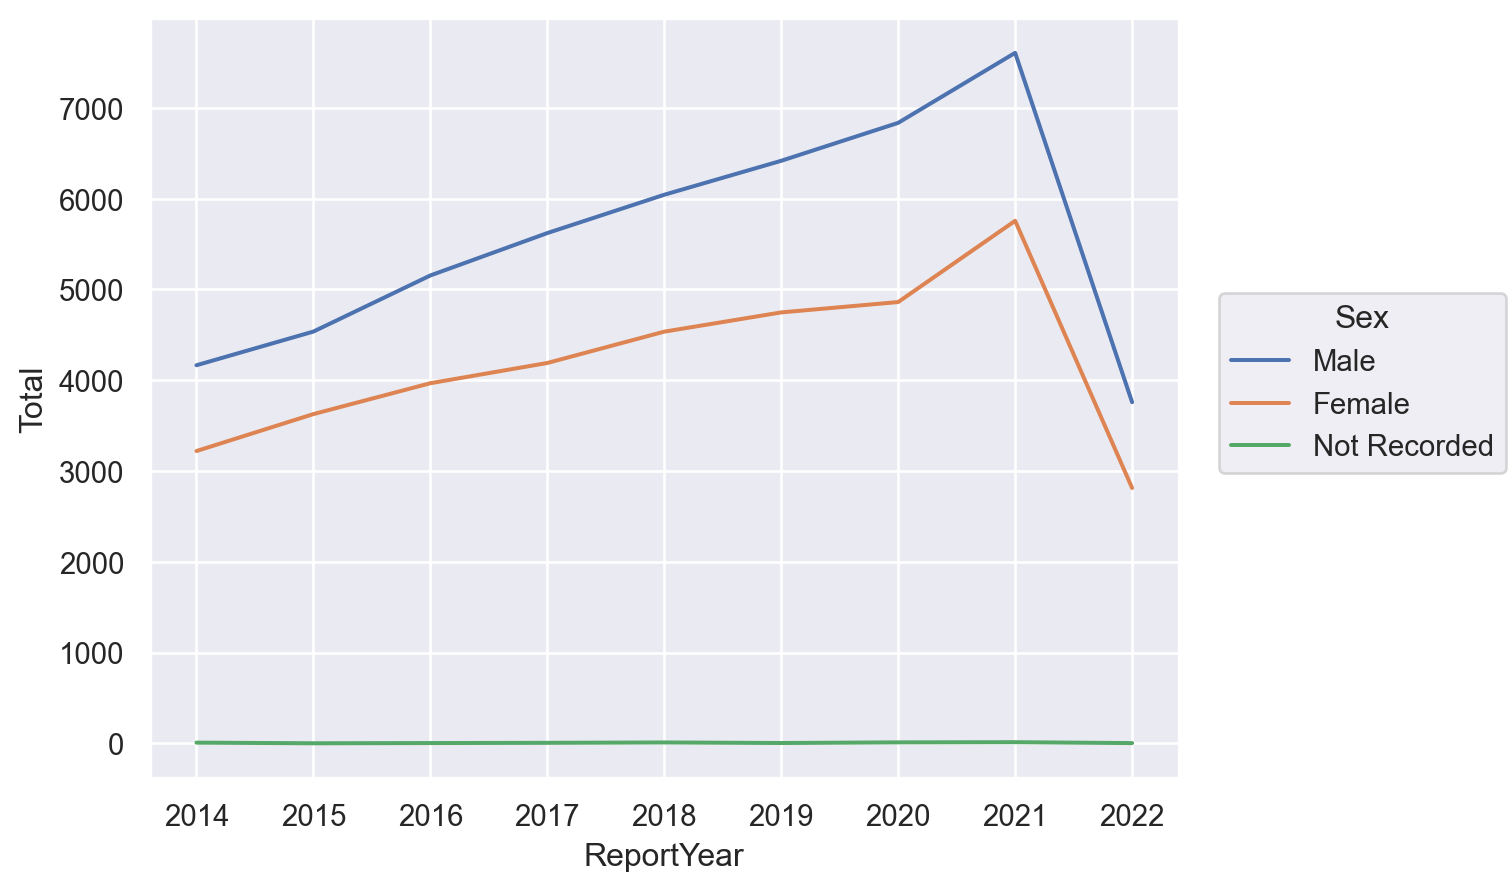

In [ ]:
gender_year = df.groupby('ReportYear')['Sex'].value_counts().to_frame().rename(columns={'Sex':'Total'})
so.Plot(gender_year, x='ReportYear', y='Total', color='Sex').add(so.Line())

Between 2014 and 2021 *Mental Health Act* arrests almost doubled. It also looks like that rate of increase is slightly higher for men over women, but we will have to look a bit closer to be sure. It also looks like there was a marked uptick of arrests in 2021. Perhaps this is related to the pandemic?

Why the steep drop off in 2022? The year is not over yet!

## Age group differences

We can look at different age categories:

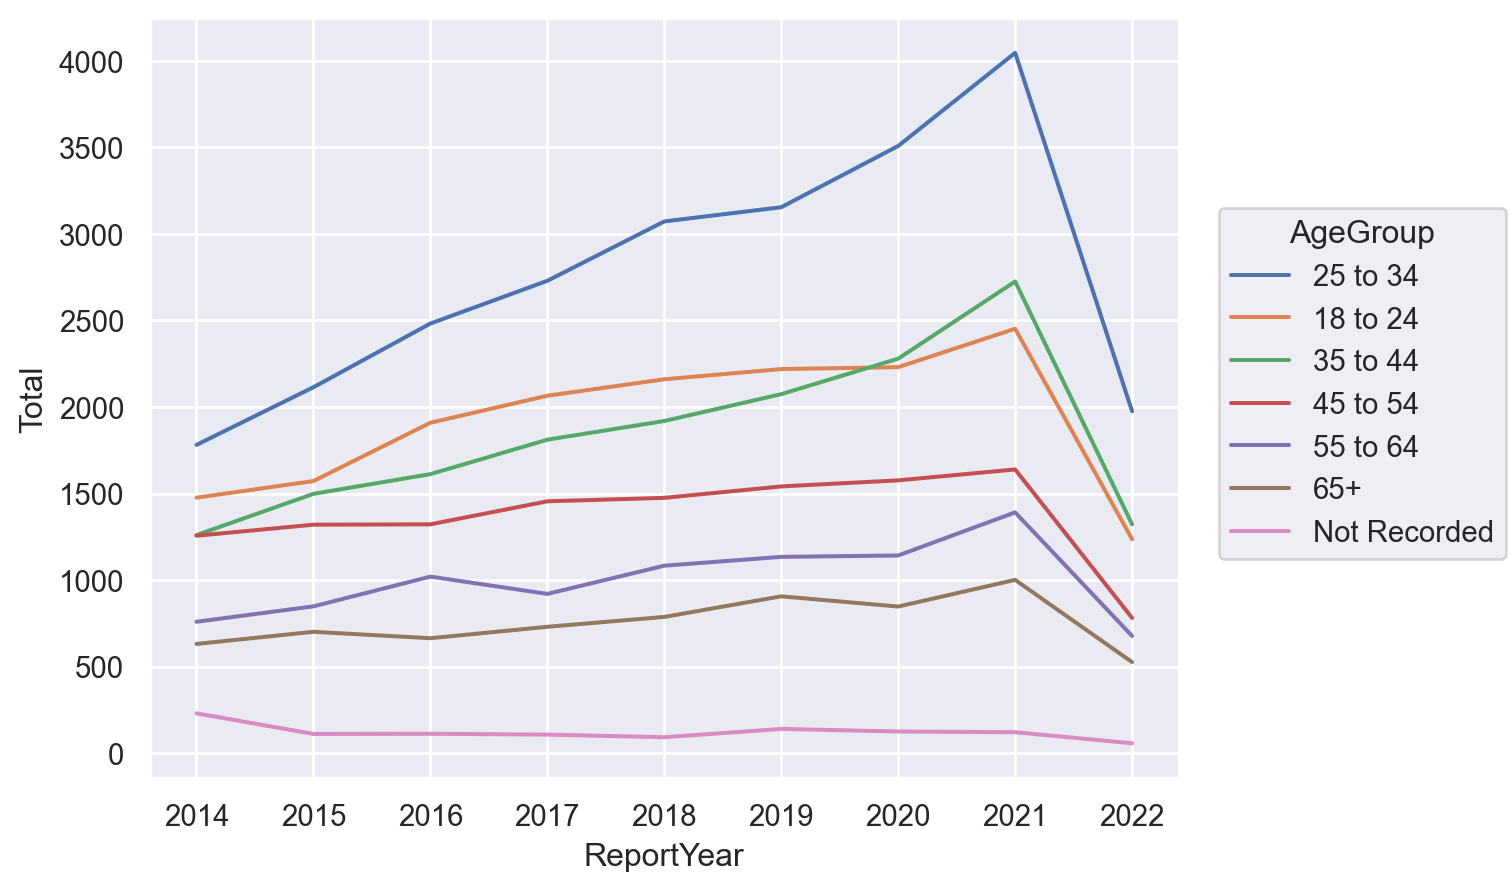

In [ ]:
age_year = df.groupby('ReportYear')['AgeGroup'].value_counts().to_frame().rename(columns={'AgeGroup':'Total'})
so.Plot(age_year, x='ReportYear', y='Total', color='AgeGroup').add(so.Line())

The 25-34 age group is far and away the largest plurality of cases.

In [ ]:
filt = df['ReportYear'] == 2021
df[filt]['AgeGroup'].value_counts(normalize=True)

25 to 34        0.302505
35 to 44        0.203738
18 to 24        0.183327
45 to 54        0.122542
55 to 64        0.104000
65+             0.074841
Not Recorded    0.009047
Name: AgeGroup, dtype: float64

## Location of arrest

People can get arrested in all sorts of places. Let's see where individuals are apprehended:

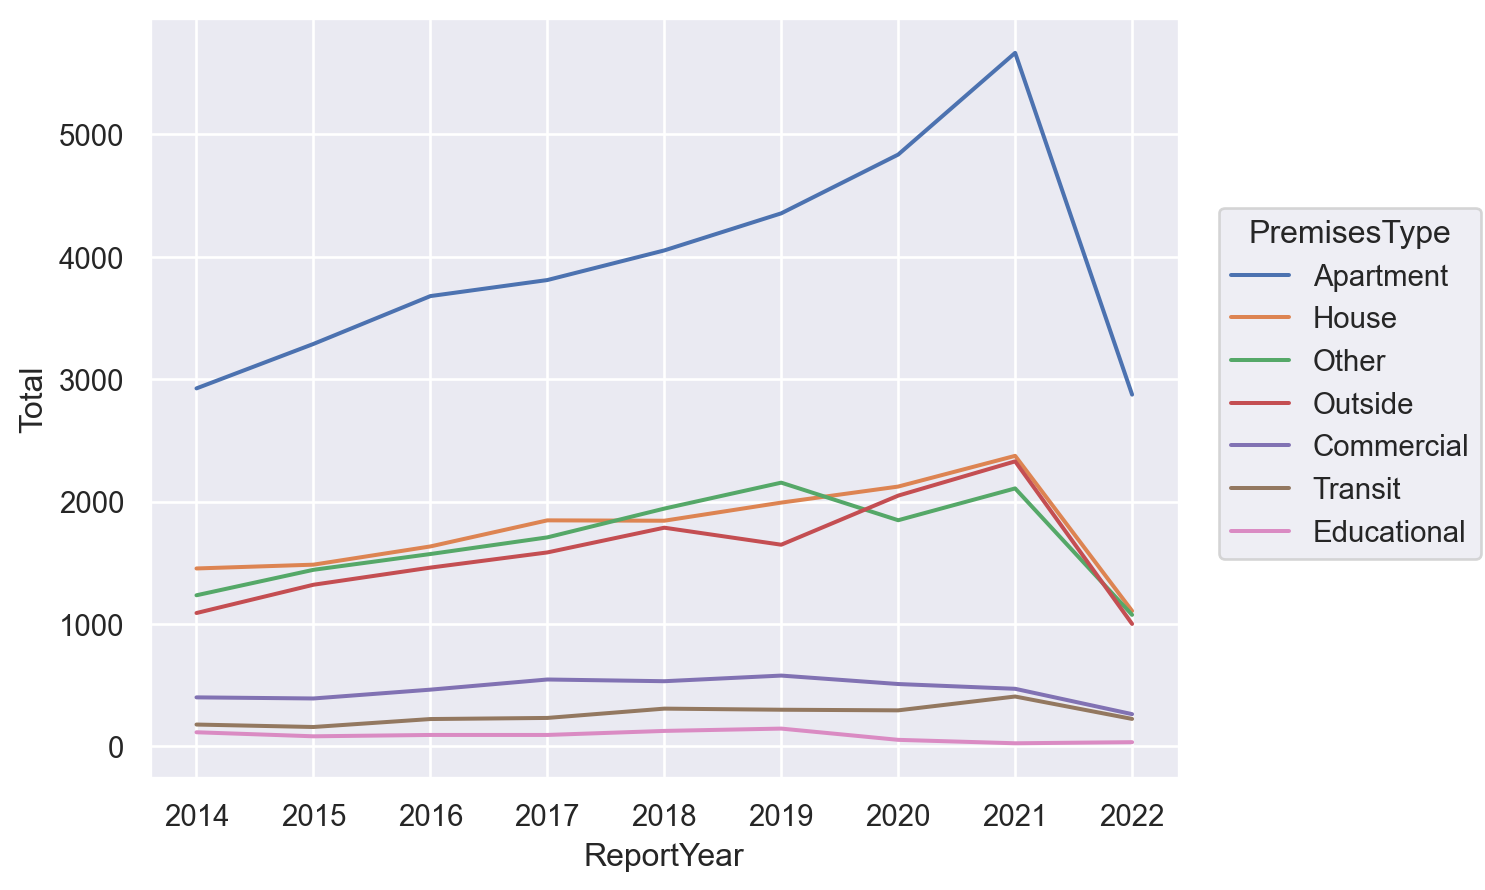

In [ ]:
prem_year = df.groupby('ReportYear')['PremisesType'].value_counts().to_frame().rename(columns={'PremisesType':'Total'})
so.Plot(prem_year, x='ReportYear', y='Total', color='PremisesType').add(so.Line())

This is a surprising and interesting visualization because I did not expect apartments --- peoples' homes --- to be the main site of arrest. This implies that people are being arrested after they or someone in their household calls for help.

## Time of year, day of week, and time of day

Different months:

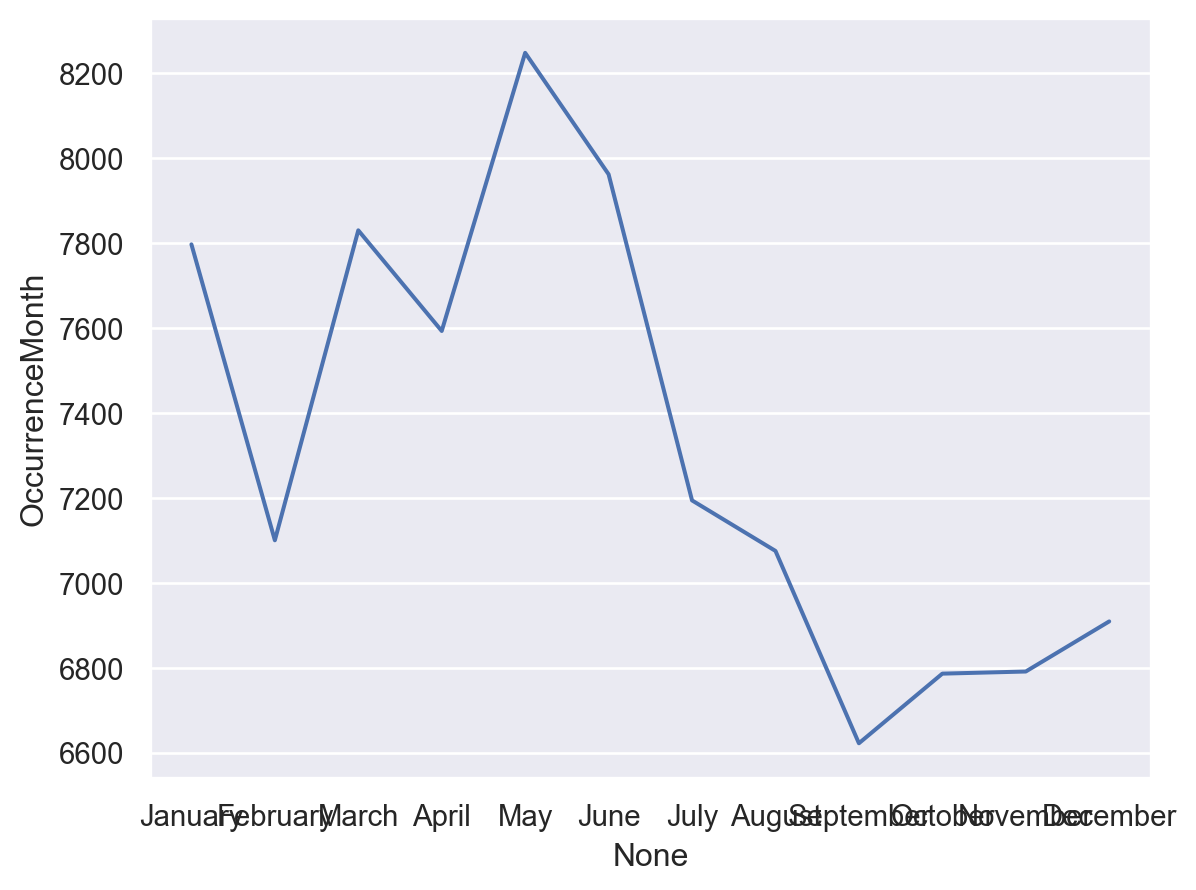

In [ ]:
month = df['OccurrenceMonth'].value_counts(normalize=False).to_frame()
month = month.reindex(["January", "February", "March", 'April', 'May','June','July','August','September','October','November','December'])
so.Plot(month, x=month.index, y='OccurrenceMonth').add(so.Line())

This shows that March, April, May, and June are the biggest months for arrests.

Different days:

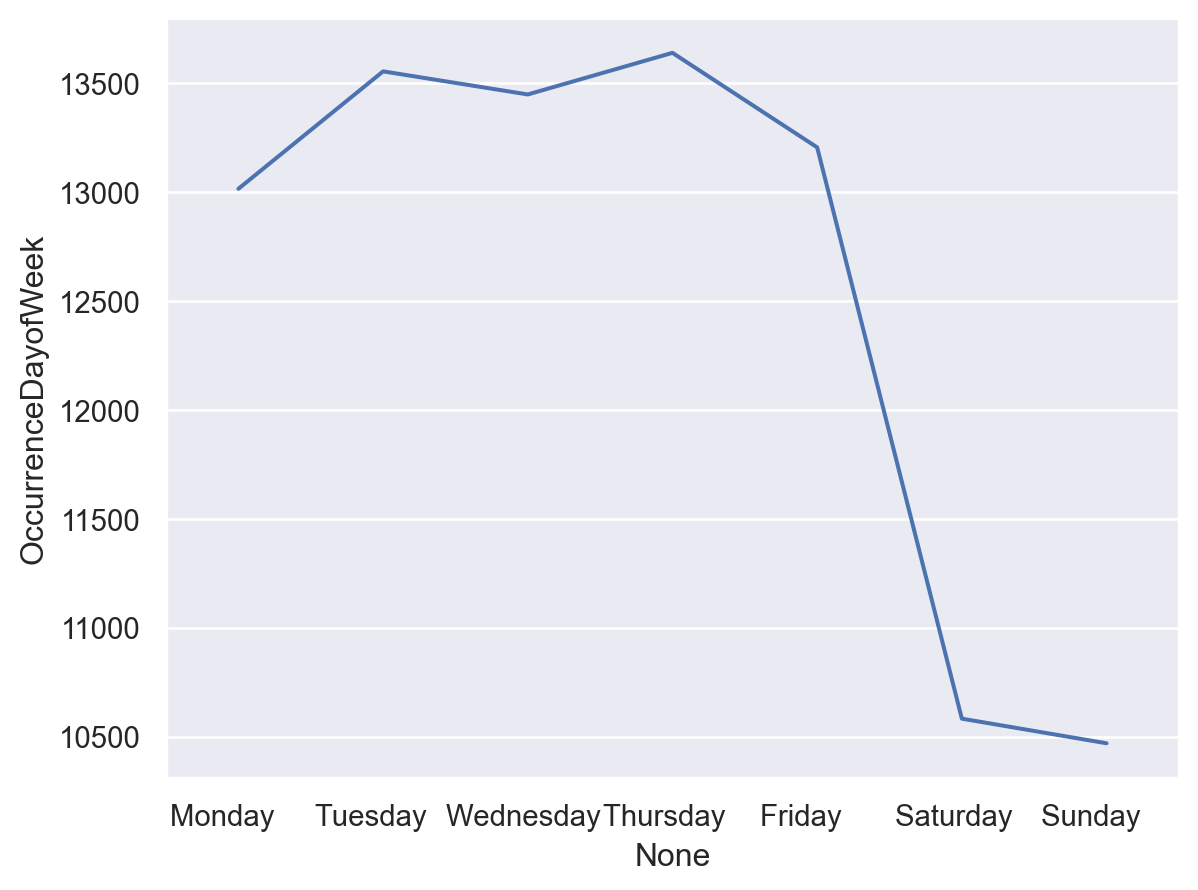

In [ ]:
day_week = df['OccurrenceDayofWeek'].value_counts().to_frame()
day_week = day_week.reindex(['Monday    ', 'Tuesday   ','Wednesday ','Thursday  ','Friday    ','Saturday  ','Sunday    '])
so.Plot(day_week,x=day_week.index,y='OccurrenceDayofWeek').add(so.Line())

There's a huge drop off in arrests on the weekend.

## Legal bases for the apprehension

Under what authority are people getting arrested?

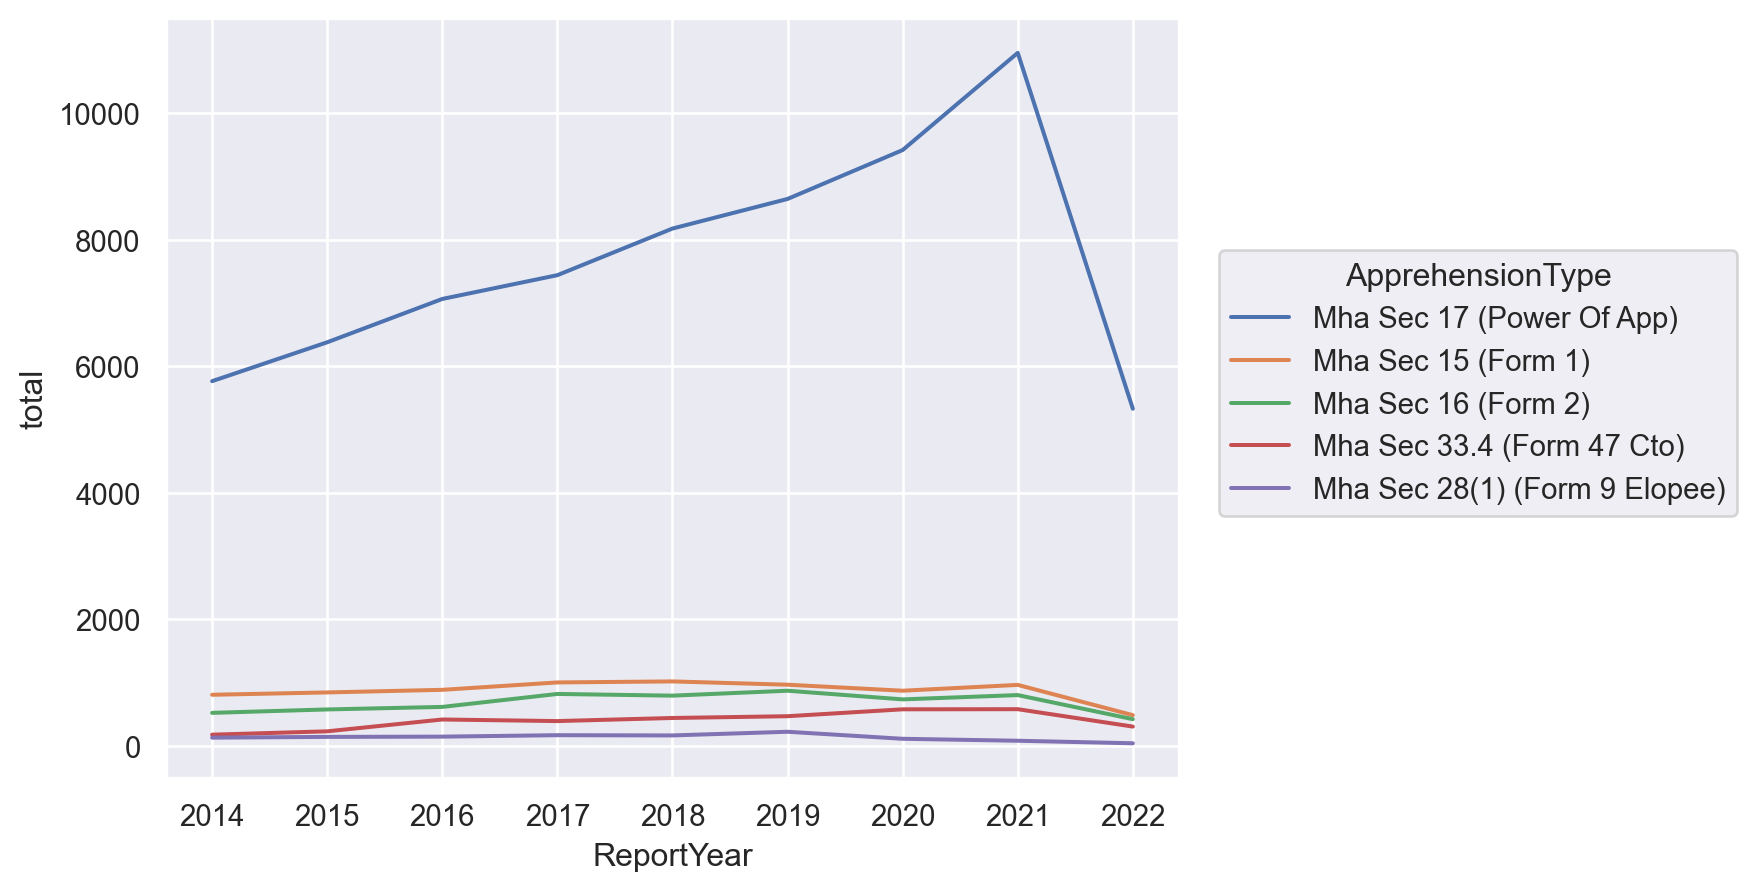

In [ ]:
app_type = df.groupby('ReportYear')['ApprehensionType'].value_counts(normalize=False).to_frame(name='total').reset_index()
so.Plot(app_type, x='ReportYear', y='total', color='ApprehensionType').add(so.Line())

This is by far the most interesting graphic. [Section 17](https://www.canlii.org/en/on/laws/stat/rso-1990-c-m7/latest/rso-1990-c-m7.html) of the *Mental Health Act* gives the police the power to arrest people in some circumstances because of their psychiatric condition. The police use of this power has steadily increased. Is this because they are charging fewer people criminally (and diverting them from the criminal justice system)? Is it that calls are on the rise? Further (interesting) research is required. 